In [2]:
import sys, os
import yaml
from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from xbout import open_boutdataset


# This comes from https://github.com/mikekryjak/sdtools
sys.path.append(os.path.join(r"C:\Users\Mike\OneDrive\Project\python-packages\sdtools"))
from hermes3.grid_fields import *

# This is notebook stuff, it auto re-imports packages 
# %matplotlib qt
%load_ext autoreload
%autoreload 2

In [ ]:
gridname = "test_orthogonal"
path = os.path.join(r"C:\Users\Mike\OneDrive\Project\python-packages\Hypnotoad\integrated_tests\connected_doublenull_orthogonal")
path_yaml = os.path.join(path, f"{gridname}.yml")
path_grid = os.path.join(path, f"{gridname}.nc")

# Plotting existing grids
I am sure there are methods for this in Hypnotoad!!! but I don't know them.

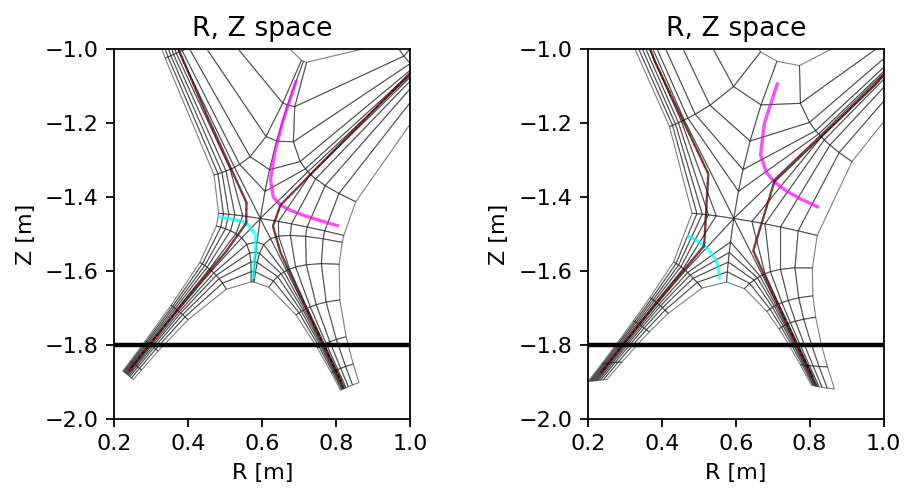

In [29]:
orthogonal = r"C:\Users\Mike\OneDrive\Project\python-packages\Hypnotoad\integrated_tests\connected_doublenull_orthogonal\expected_orthogonal.grd.nc"
nonorthog = r"C:\Users\Mike\OneDrive\Project\python-packages\Hypnotoad\integrated_tests\connected_doublenull_nonorthogonal\expected_nonorthogonal.grd.nc"


from hermes3.grid_fields import Mesh as sdMesh

fig, axes = plt.subplots(1,2, figsize = (7,3), dpi = 160)
ax = axes[0]
sdMesh(orthogonal).plot_rz_grid(ax = ax)

ax = axes[1]
sdMesh(nonorthog).plot_rz_grid(ax = ax)

for ax in axes:
    eq.plotWall(axis = ax)
    ax.grid(False)
    ax.legend().set_visible(False)
    ax.set_xlim(0.2, 1.0)
    ax.set_ylim(-2.0, -1.0)

# Grid generation

Assume grid and input file have the same name

# I/O
Read settings file and equilibrium

In [5]:
gridname = "test_orthogonal"
path = os.path.join(r"C:\Users\Mike\OneDrive\Project\python-packages\Hypnotoad\integrated_tests\connected_doublenull_orthogonal")
path_yaml = os.path.join(path, f"{gridname}.yml")
path_grid = os.path.join(path, f"{gridname}.nc")  # This is for the grid we generate and want to save somewhere
path_eq = r"C:\Users\Mike\OneDrive\Project\python-packages\Hypnotoad\integrated_tests\grid_files\test_connected-double-null.eqdsk"
    
# Read options
with open(path_yaml) as f:
	options = yaml.safe_load(f)
 
# Read geqdsk
with open(path_eq) as fh:
    eq = tokamak.read_geqdsk(fh, settings=options, nonorthogonal_settings=options)

  nx = 65, ny = 65

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  5e-16                      
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  1.0                        
finecontour_maxits                                |  1000                       
finecontour_overdamping_factor                    |  0.8             (default)  
leg_refine_atol                                   |  2e-16                      
leg_refine_maxits                                 |  10000                      
leg_trace_atol                                    |  5e-17           (default)  


c:\pyenvs\fusion312\Lib\site-packages\scipy\integrate\_ivp\common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


Generating a connected double null


# Plotting equilibrium and wall

(-2.0, -0.8)

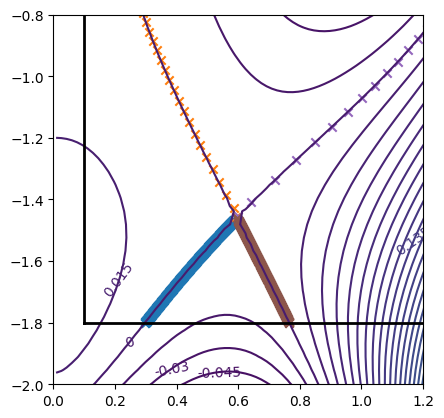

In [22]:
eq.plotPotential(ncontours = 100)
eq.plotSeparatrix()
eq.plotWall()

# Both lower divertors
plt.xlim([0, 1.2])
plt.ylim([-2.0,-0.8])     

## Generate grid

In [28]:
mesh = BoutMesh(eq, options)
mesh.calculateRZ()


Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
cap_Bp_ylow_xpoint                                |  False           (default)  
curvature_smoothing                               |  None            (default)  
curvature_type                                    |  curl(b/B)       (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  5e-16                      
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  1.0                        
finecontour_maxits                                |  1000                       
finecontour_overdamping_factor                    |  0.8             (default)  
follow_perpendicular_atol                         |  1e-20                      
follow_perpendicula

c:\pyenvs\fusion312\Lib\site-packages\scipy\integrate\_ivp\common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


creating region 1 - inner_lower_divertor(1)
creating region 2 - inner_core(0)
creating region 3 - inner_core(1)
creating region 4 - inner_upper_divertor(0)
creating region 5 - inner_upper_divertor(1)
creating region 6 - outer_upper_divertor(0)
creating region 7 - outer_upper_divertor(1)
creating region 8 - outer_core(0)
creating region 9 - outer_core(1)
creating region 10 - outer_lower_divertor(0)
creating region 11 - outer_lower_divertor(1)
Get RZ valuespendicular: 13


Plot grid

(-2.0, -0.8)

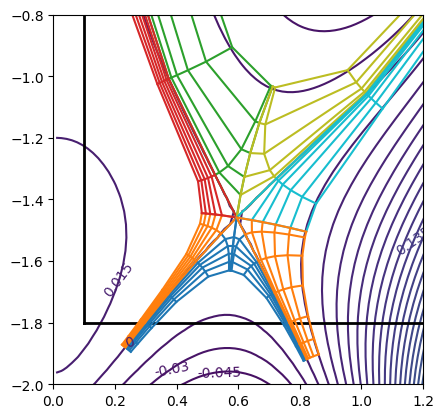

In [27]:
fig, ax = plt.subplots()
eq.plotPotential(axis = ax, ncontours = 100)
# eq.plotSeparatrix(axis = ax)
eq.plotWall(axis = ax)
mesh.plotGridCellEdges(ax = ax)
ax.set_aspect("equal")

# Both lower divertors
plt.xlim([0, 1.2])
plt.ylim([-2.0,-0.8])  

# Save

In [ ]:
mesh.geometry()
mesh.writeGridfile(path_grid)